In [1]:
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('data/*.{}'.format(extension))]
df = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [3]:
font = {'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [4]:
def plot_results(df, model_name):
    labels = model_name +"\n"+ df.version.astype(str)
    x = np.arange(len(labels))  # the label locations
    width = 0.60  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x - width/3, df['vs negamax win'], width/3, label='Negamax')
    rects2 = ax.bar(x, df['vs random win'], width/3, label='Random')
    rects3 = ax.bar(x + width/3, df['vs adv_agent win'], width/3, label='Lookahead')


    ax.set_ylabel('score')
    ax.set_title('Scores by model')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=2)
    ax.bar_label(rects2, padding=2)
    ax.bar_label(rects3, padding=2)

    fig.tight_layout()

    plt.show()

def plot_top_3(df):
    top_3 = df.sort_values(by=['vs negamax win'])
    plot_results(top_3[-3:])


In [5]:
df.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
0,less_features_3,10000,0.65,0,0.01,0,0.03,0,0.6,NaN
1,less_features_3,20000,0.66,0,0.01,0,0.03,0,0.6,NaN
2,less_features_3,30000,0.73,0,0.02,0,0.06,0,0.7,NaN
3,less_features_3,40000,0.84,0,0.0,0,0.02,0,0.8,NaN
4,less_features_3,50000,0.83,0,0.03,0,0.07,0,0.8,NaN


In [6]:
df_top = df.sort_values(by=['vs adv_agent win'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
df_top = df_top.sort_values(by=['vs adv_agent win'], ascending=False)
df_top.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
245,new_reward_1_adv,2460000,0.81,0,0.24,0,0.05,0,1.8,NaN
54,new_aggro_3,550000,0.82,0,0.17,0,0.15,0,2.3,2022-05-09 21:08:03.474300
63,new_reward_1_adv_mid,640000,0.64,0,0.16,0,0.0,0,1.1,2022-05-07 18:47:34.273905
50,new_aggro_4,510000,0.79,0,0.12,0,0.08,0,1.2,2022-05-09 23:11:37.567469
17,new_reward_1_adv_large,180000,0.63,0,0.12,0,0.02,0,1.1,NaN


In [16]:
df_top = df.sort_values(by=['vs negamax win'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
df_top = df_top.sort_values(by=['vs negamax win'], ascending=False)
df_top.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
8,new_aggro_3,90000,0.84,0,0.0,0,0.19,0,1.8,2022-05-09 19:58:24.756584
59,new_reward_1,600000,0.77,0,0.01,0,0.14,0,1.7,NaN
30,new_aggro_4,310000,0.79,0,0.02,0,0.14,0,1.7,2022-05-09 22:40:13.705022
0,new_aggro_big_1,100000,0.9,0,0.02,0,0.13,0,1.9,2022-05-10 00:30:32.811738
26,less_features_3,270000,0.84,0,0.01,0,0.13,0,1.8,NaN


In [7]:
db_by_score = df.sort_values(by=['vs random win'], ascending=False)

db_by_score.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
6,new_aggro_2,70000,0.92,0,0.01,0,0.07,0,0.9,2022-05-09 19:22:36.488710
39,new_aggro_big_1,4000000,0.92,0,0.0,0,0.02,0,0.9,2022-05-10 07:26:21.613970
1,new_aggro_big_1a,200000,0.92,0,0.02,0,0.05,0,0.9,2022-05-10 09:10:43.525310
11,less_features2,120000,0.92,0,0.04,0,0.05,0,0.9,NaN
10,new_aggro_3,110000,0.91,0,0.0,0,0.11,0,1.9,2022-05-09 20:01:20.530914


In [8]:
#filtered_df=df[(df.score < 40) & (df.C_3 > 450)]

def plot_agent_vs(df, vs):
    fig, ax = plt.subplots(figsize=(30, 10))
    df_ppo = df.sort_values(['model', 'version'], ascending=[True, True])


    marker = {
        "marker":"o", 
        "markersize":5
    }

    for model in pd.unique(df['model']):
        models = df_ppo[df_ppo['model']==model]
        ax.plot(models['version'], models[vs], label=model, **marker)

    ax.legend()
    plt.title(f'{vs} /time')
    plt.xlabel('Version')
    plt.ylabel('Win%')
    plt.show()


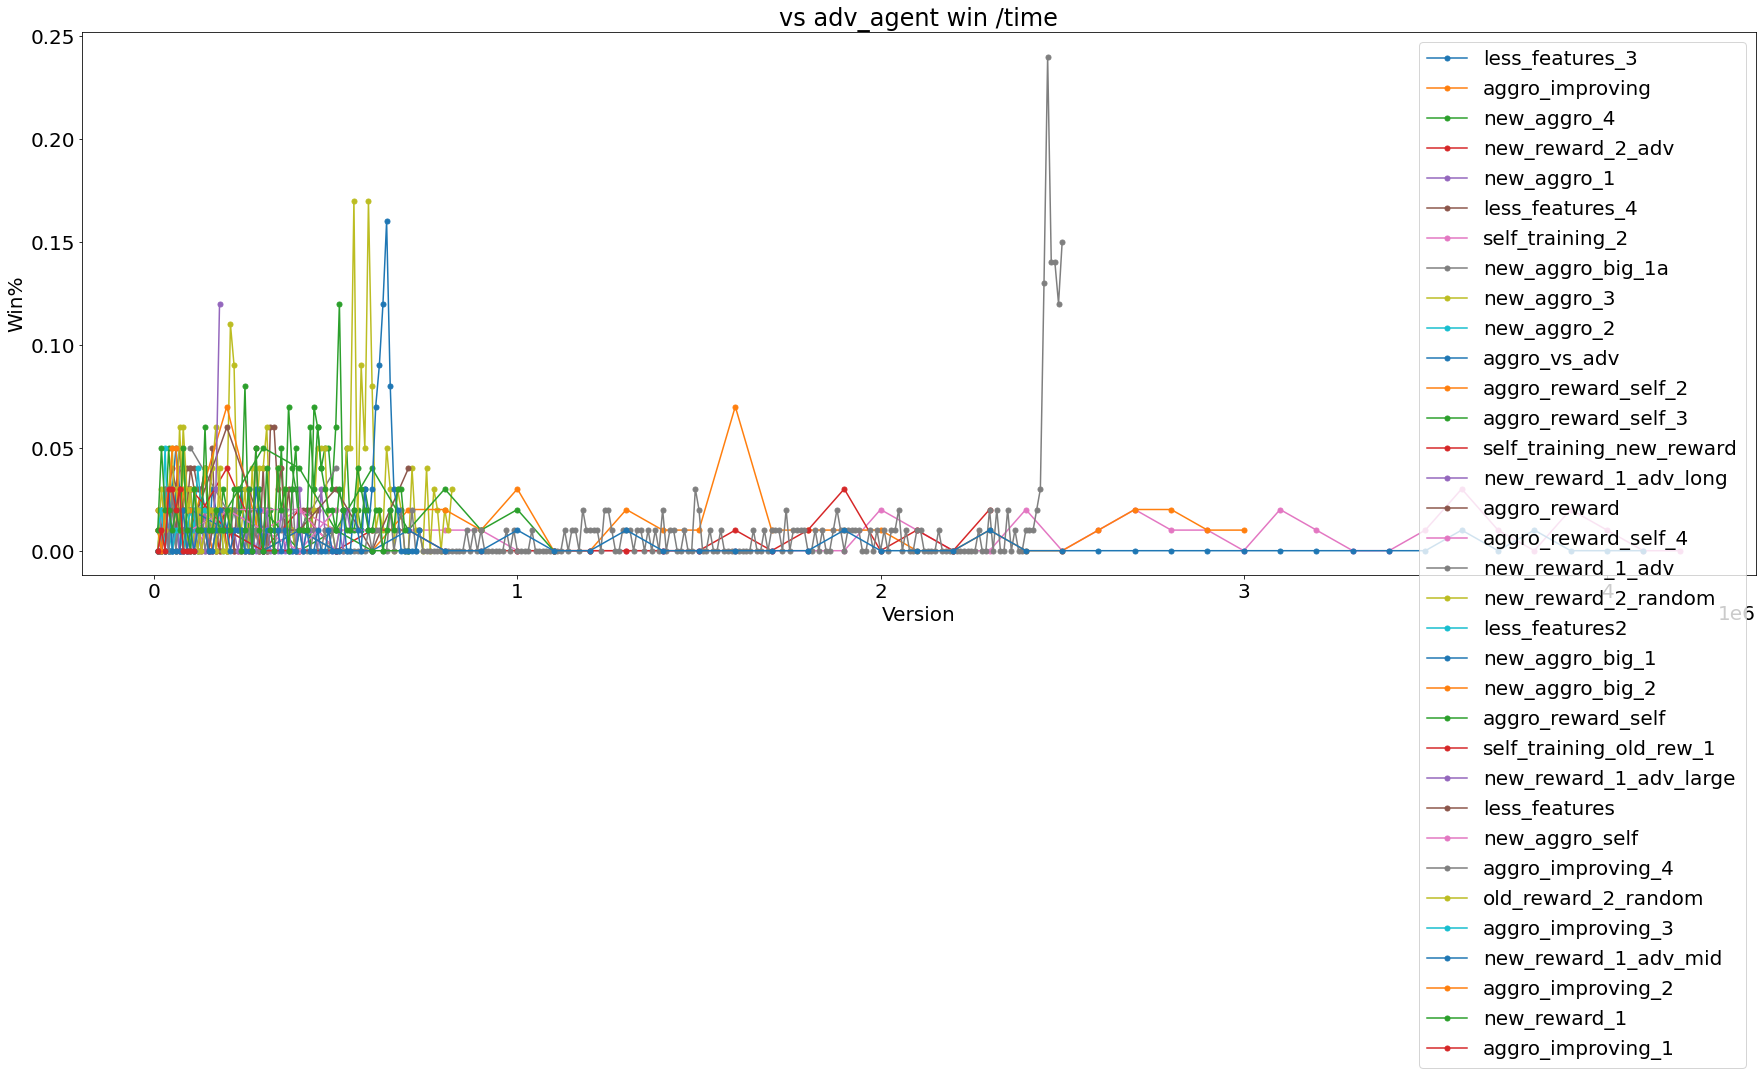

In [9]:
plot_agent_vs(df, "vs adv_agent win")

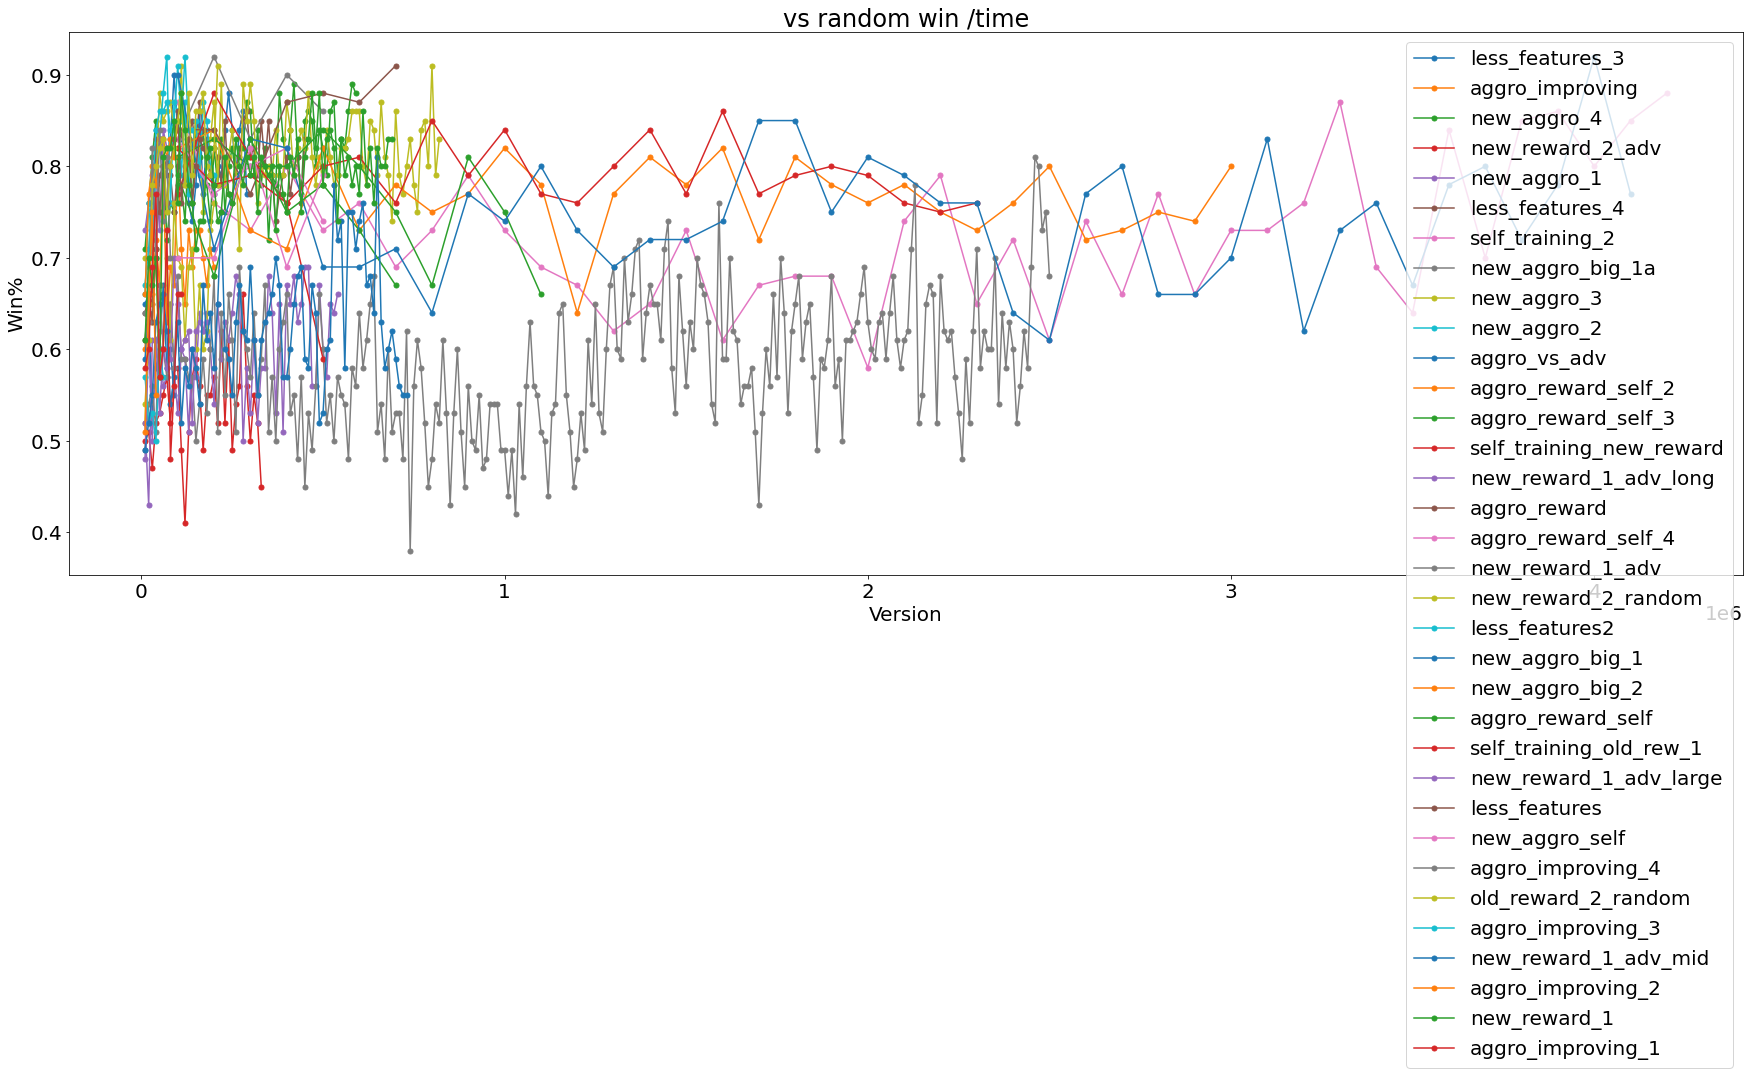

In [10]:
plot_agent_vs(df, "vs random win")

In [11]:
def plot_agent_over_time(model_name):
    fig, ax = plt.subplots(figsize=(30, 15))
    df_ppo = df[df['model']==model_name].sort_values(by=['version'])

    marker = {
        "marker":"o", 
        "markersize":10
    }


    plt.hlines(y=0.8, xmin=0, xmax=df_ppo['version'].max(), colors='green', linestyles='-', lw=1, label='switch to adv')
    plt.hlines(y=0.5, xmin=0, xmax=df_ppo['version'].max(), colors='tomato', linestyles='-', lw=1, label='switch to random')

    ax.plot(df_ppo['version'], df_ppo['vs random win'], label="vs random", **marker)
    ax.plot(df_ppo['version'], df_ppo['vs adv_agent win'], label="vs adv_agent", **marker)
    ax.plot(df_ppo['version'], df_ppo['vs negamax win'], label="vs negamax", **marker)


    ax.legend()
    plt.title(f'{model_name} win over time')
    plt.xlabel('Version')
    plt.ylabel('Win%')

    ax.legend()

    plt.show()


/Users/rserra/miniforge3/envs/connectx/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


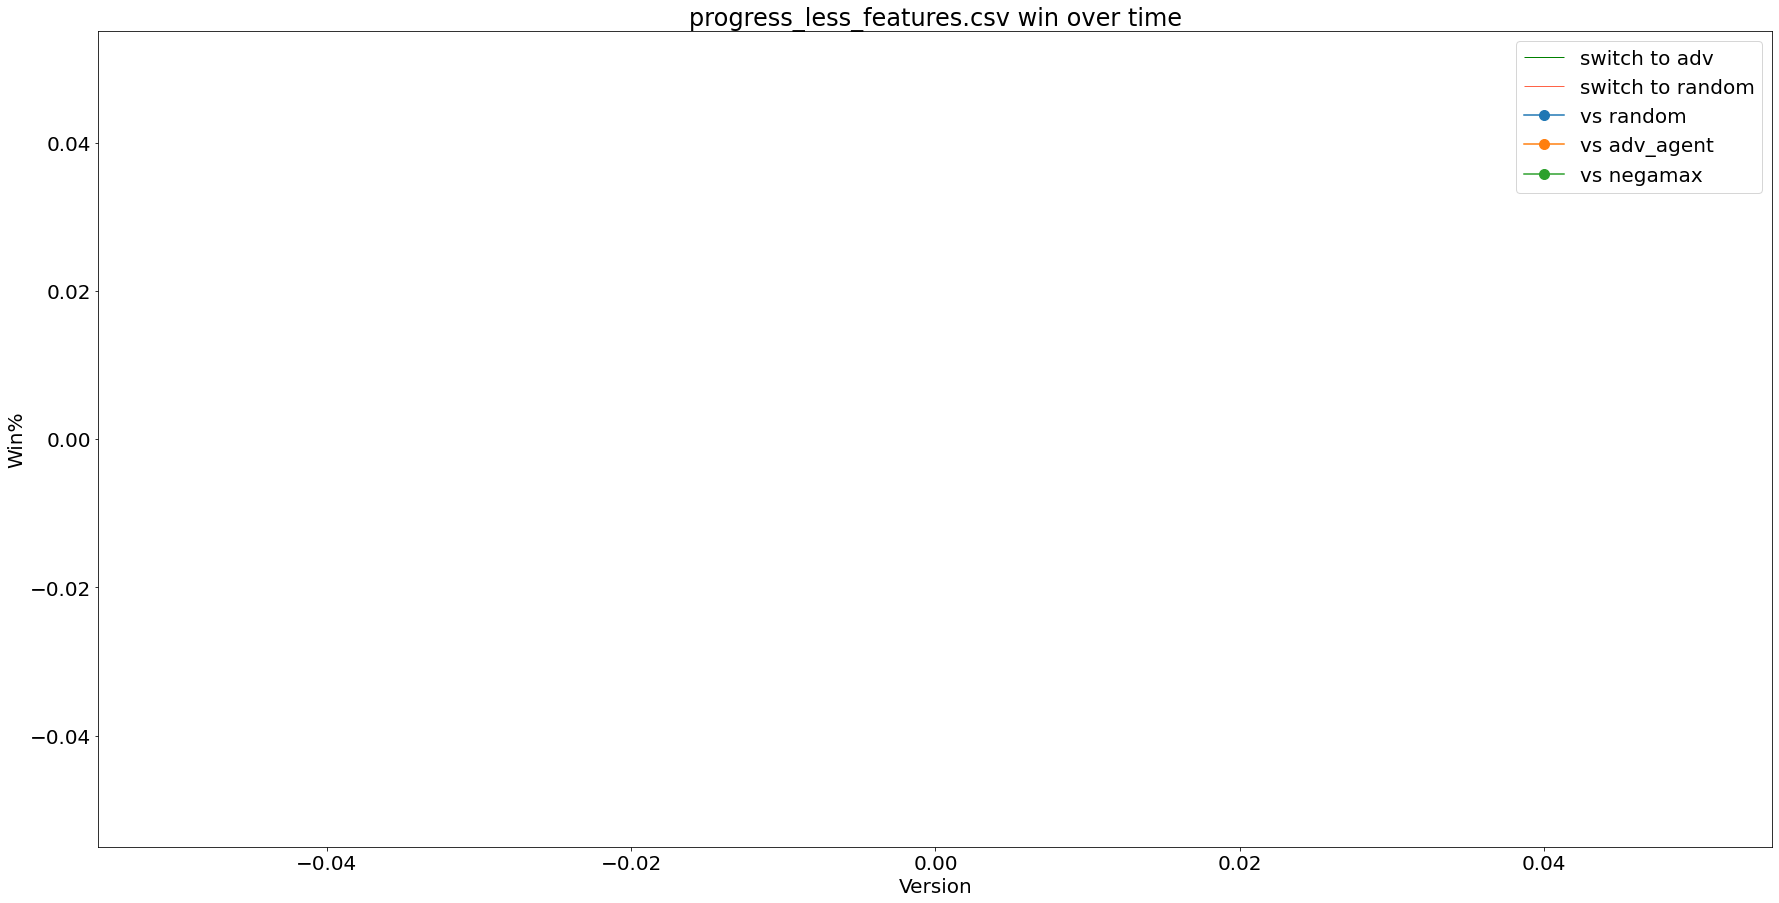

In [12]:
plot_agent_over_time("progress_less_features.csv")

/Users/rserra/miniforge3/envs/connectx/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


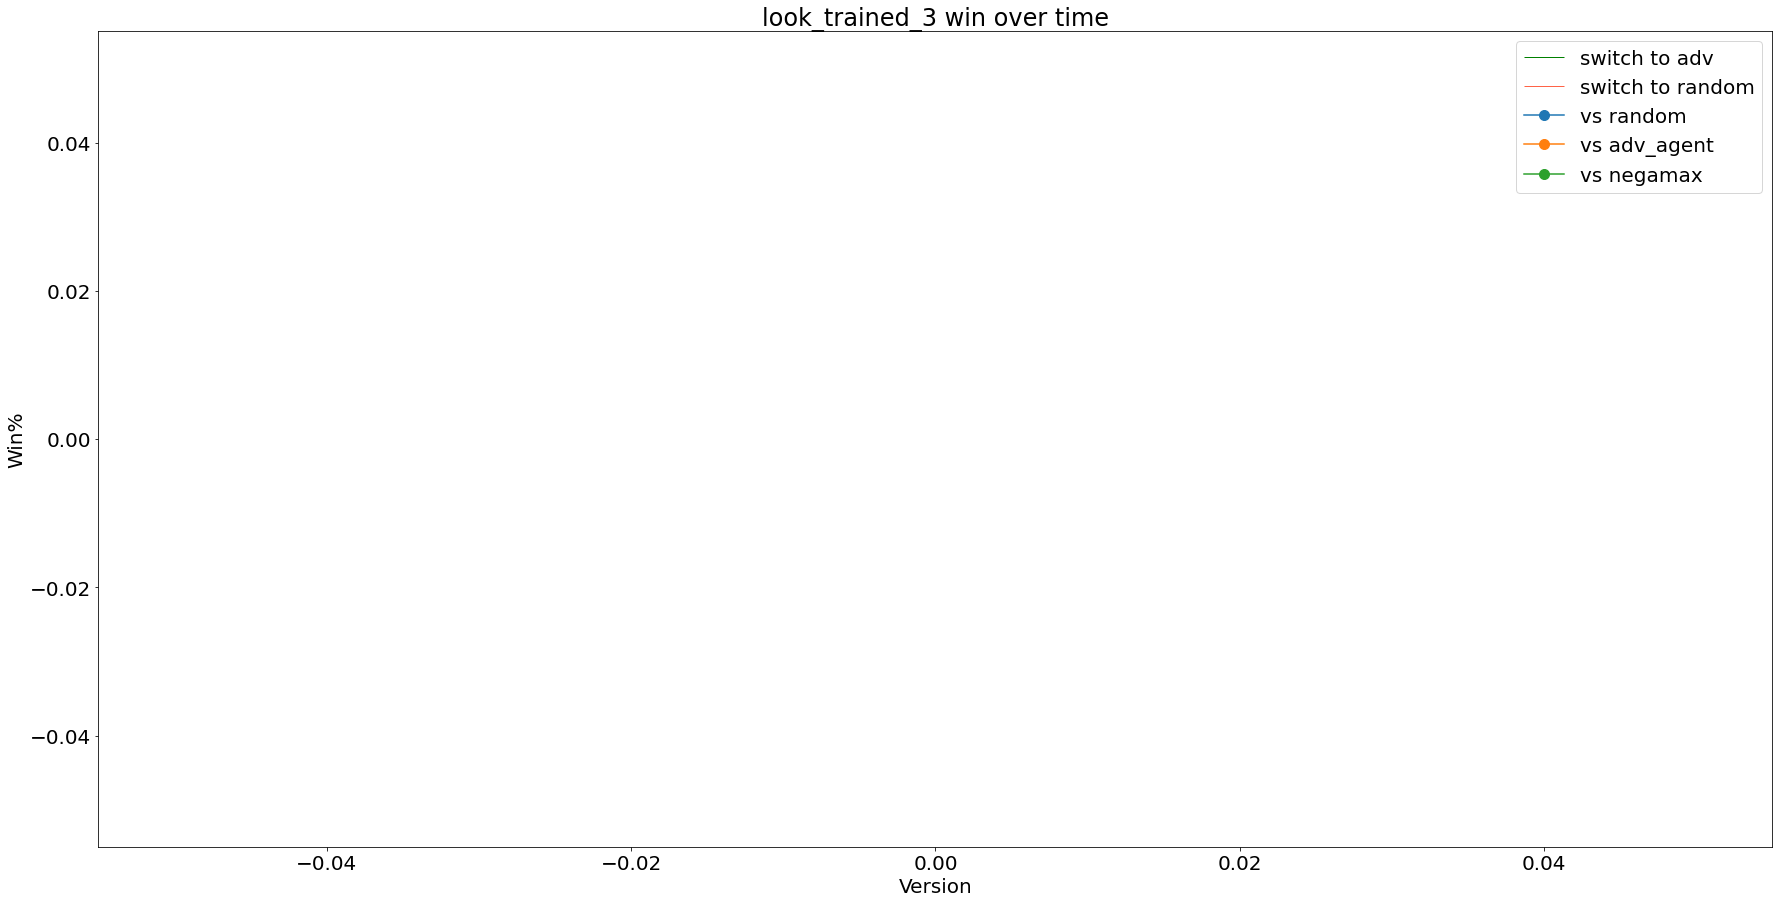

In [13]:
plot_agent_over_time("look_trained_3")